In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(889, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# KNN

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [9]:
x = df[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Pclass']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)

In [11]:
def knn_model(x,y):
    s = []
    for i in range(1,268):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train).score(x_test,y_test)
        y_pred=knn.predict(x_test)
        print("The performance metric for the model with k=",i," : ")
        score = knn.score(x_test,y_test)
        s.append(score)
        print("The accuracy score : ",score)
        print("The confusion matrix : ")
        print(confusion_matrix(y_test,y_pred))
        
        
    plt.plot(range(1,268),s)

The performance metric for the model with k= 1  : 
The accuracy score :  0.8913857677902621
The confusion matrix : 
[[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
The performance metric for the model with k= 2  : 
The accuracy score :  0.8651685393258427
The confusion matrix : 
[[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
The performance metric for the model with k= 3  : 
The accuracy score :  0.8651685393258427
The confusion matrix : 
[[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
The performance metric for the model with k= 4  : 
The accuracy score :  0.8239700374531835
The confusion matrix : 
[[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
The performance metric for the model with k= 5  : 
The accuracy score :  0.8314606741573034
The confusion matrix : 
[[ 58  10   2]
 [  7  28  14]
 [  3   9 136]]
The performance metric for the model with k= 6  : 
The accuracy score :  0.846441947565543
The confusion matrix : 
[[ 64   5   1]
 [  7  32  10]
 [  3  15 130]]
The performance metric for th

The performance metric for the model with k= 55  : 
The accuracy score :  0.7715355805243446
The confusion matrix : 
[[ 61   6   3]
 [  7  12  30]
 [  5  10 133]]
The performance metric for the model with k= 56  : 
The accuracy score :  0.7752808988764045
The confusion matrix : 
[[ 62   5   3]
 [  7  12  30]
 [  5  10 133]]
The performance metric for the model with k= 57  : 
The accuracy score :  0.7752808988764045
The confusion matrix : 
[[ 62   5   3]
 [  7  12  30]
 [  5  10 133]]
The performance metric for the model with k= 58  : 
The accuracy score :  0.7677902621722846
The confusion matrix : 
[[ 60   5   5]
 [  6  12  31]
 [  5  10 133]]
The performance metric for the model with k= 59  : 
The accuracy score :  0.7602996254681648
The confusion matrix : 
[[ 60   5   5]
 [  6  11  32]
 [  5  11 132]]
The performance metric for the model with k= 60  : 
The accuracy score :  0.7640449438202247
The confusion matrix : 
[[ 60   5   5]
 [  6  12  31]
 [  5  11 132]]
The performance metric

[[ 53   6  11]
 [  5  12  32]
 [  5  10 133]]
The performance metric for the model with k= 107  : 
The accuracy score :  0.7415730337078652
The confusion matrix : 
[[ 53   9   8]
 [  5  12  32]
 [  5  10 133]]
The performance metric for the model with k= 108  : 
The accuracy score :  0.7453183520599251
The confusion matrix : 
[[ 53   8   9]
 [  5  12  32]
 [  5   9 134]]
The performance metric for the model with k= 109  : 
The accuracy score :  0.7490636704119851
The confusion matrix : 
[[ 53   9   8]
 [  5  12  32]
 [  5   8 135]]
The performance metric for the model with k= 110  : 
The accuracy score :  0.7528089887640449
The confusion matrix : 
[[ 53   8   9]
 [  5  13  31]
 [  5   8 135]]
The performance metric for the model with k= 111  : 
The accuracy score :  0.7490636704119851
The confusion matrix : 
[[ 53   8   9]
 [  5  12  32]
 [  5   8 135]]
The performance metric for the model with k= 112  : 
The accuracy score :  0.7453183520599251
The confusion matrix : 
[[ 53   8   9]
 

The accuracy score :  0.7565543071161048
The confusion matrix : 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
The performance metric for the model with k= 159  : 
The accuracy score :  0.7565543071161048
The confusion matrix : 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
The performance metric for the model with k= 160  : 
The accuracy score :  0.7565543071161048
The confusion matrix : 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
The performance metric for the model with k= 161  : 
The accuracy score :  0.7528089887640449
The confusion matrix : 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
The performance metric for the model with k= 162  : 
The accuracy score :  0.7528089887640449
The confusion matrix : 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
The performance metric for the model with k= 163  : 
The accuracy score :  0.7528089887640449
The confusion matrix : 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
The performance metric for the model with k= 164  : 
The accuracy sco

The performance metric for the model with k= 211  : 
The accuracy score :  0.7228464419475655
The confusion matrix : 
[[ 48   5  17]
 [  4   2  43]
 [  5   0 143]]
The performance metric for the model with k= 212  : 
The accuracy score :  0.7228464419475655
The confusion matrix : 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
The performance metric for the model with k= 213  : 
The accuracy score :  0.7228464419475655
The confusion matrix : 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
The performance metric for the model with k= 214  : 
The accuracy score :  0.7228464419475655
The confusion matrix : 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
The performance metric for the model with k= 215  : 
The accuracy score :  0.7228464419475655
The confusion matrix : 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
The performance metric for the model with k= 216  : 
The accuracy score :  0.7228464419475655
The confusion matrix : 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
The performance 

[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
The performance metric for the model with k= 262  : 
The accuracy score :  0.7191011235955056
The confusion matrix : 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
The performance metric for the model with k= 263  : 
The accuracy score :  0.7191011235955056
The confusion matrix : 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
The performance metric for the model with k= 264  : 
The accuracy score :  0.7191011235955056
The confusion matrix : 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
The performance metric for the model with k= 265  : 
The accuracy score :  0.7191011235955056
The confusion matrix : 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
The performance metric for the model with k= 266  : 
The accuracy score :  0.7153558052434457
The confusion matrix : 
[[ 47   0  23]
 [  4   1  44]
 [  5   0 143]]
The performance metric for the model with k= 267  : 
The accuracy score :  0.7153558052434457
The confusion matrix : 
[[ 47   1  22]
 

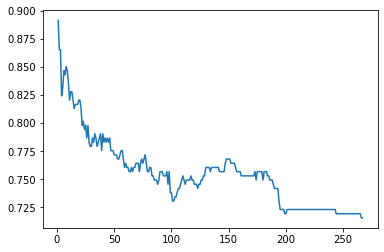

In [12]:
knn_model(x,y)